In [1]:
%matplotlib inline

import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from md_distance import md_distance
from md_distance import gen_pairs
from refframes import refframe_switch1
from refframes import refframe_switch2

In [2]:
source = 'vreede'
run = 'run1'
if source == 'vreede':
    current_dir = '/home/sanderroet/Ras-JV/'+run+'/analysis/'
    name = 'vreede_'+run
elif source == 'carbon':
    current_dir = '/home/sanderroet/carbon/kras_100ns/'+run+'/analysis/'
    name = 'carbon_'+run
xtc = current_dir + 'vis-md.xtc'
pdb = current_dir + 'vis-md.pdb'

In [3]:
%%time
trj = md.load(xtc, top = pdb)
#reference = md.load(test_pdb)

CPU times: user 17.1 s, sys: 1.39 s, total: 18.5 s
Wall time: 19.4 s


In [4]:
%%time
topology = trj.topology
G60 = topology.select('protein and (resSeq 60 or resSeq 63)')
gly60 = topology.select('protein and (resSeq 60) and not name H')
gly12 = topology.select('protein and (resSeq 12) and not name H')
glu63 = topology.select('protein and (resSeq 63) and not name H')
glu62 = topology.select('protein and (resSeq 62) and not name H')
glu37 = topology.select('protein and (resSeq 37) and not name H')

D33 = topology.select('protein and resSeq 33 and element O and not name O')
asp30 = topology.select('protein and resSeq 30')
his27 = topology.select('protein and resSeq 27')
GTP = topology.select('(resname GTP) and not name H')
GTP_sugar= topology.select('resname GTP and (name =~ "O[2-3]\'")')
MG = topology.select('element Mg')
switch1 = topology.select('protein and(resSeq 30 to 38)')# and not name H')
switch2 = topology.select('protein and(resSeq 60 to 76)')
for i in G60:
    print(topology.atom(i).residue)

GLY60
GLY60
GLY60
GLY60
GLY60
GLY60
GLY60
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
GLU63
CPU times: user 573 ms, sys: 0 ns, total: 573 ms
Wall time: 572 ms


In [5]:
protein = topology.select('protein or resname GTP')
new_trj = trj.atom_slice(protein)
print(len(trj.xyz[0]))
print(len(new_trj.xyz[0]))

22561
2670


In [6]:
results = md.shrake_rupley(new_trj[::10], mode='residue')
print(len(results))

1001


In [7]:
print(len(results[0]))
new_results=[]
for i in results:
    new_results.append(sum(i[59:61]))
print(len(new_results))

167
1001


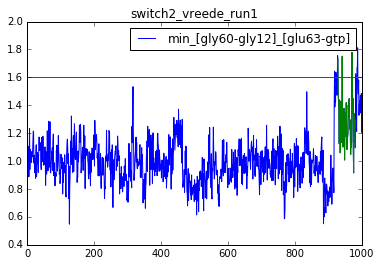

In [8]:


for i, e in enumerate([new_results]):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    y = e
    x = range(len(e))

    if i == 0:
        lbl = 'min_[gly60-gly12]_[glu63-gtp]'
        savename='gtp_D30_distance'
        start, stop = refframe_switch2[name]
    if i == 1:
        lbl = 'glu63--GTP'
        savename='gtp_D33_distance'
        start, stop = refframe_switch2[name]
    if i == 2:
        lbl = 'D33--MG'
        savename='D33_MG_distance'
    ax.plot(x,y, label = lbl)
    ax.plot([x[0],x[-1]],[1.6,1.6], c='red')
    for i, j in enumerate(start):
        start1 = int(j/10)
        stop1 = int(stop[i]/10) 
        x = range(start1,stop1)
        y = e[start1:stop1]
        ax.plot(x,y, c='green')

#    plt.ylim([0.0,2.0])
#    ax.set_ylabel('nm')
#    ax.set_xlabel('frame')
    ax.set_title('switch2_'+source+'_'+run)
    ax.legend()
    plt.show
fig.savefig(current_dir+'proposed_switch2.png')